In [4]:
#Download the training data from IBM object storege system

In [5]:
!wget --quiet -O /resources/data/train_data_keras.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_KERAS
#decompress data
!tar -xzf /resources/data/train_data_keras.tar.gz -C /resources/data --exclude '.*'

In [6]:
#Download and decompress the validation data
!wget --quiet -O /resources/data/validation_data_keras.tar.gz https://cocl.us/DL0320EN_VALID_TAR_KERAS
!tar -xzf /resources/data/validation_data_keras.tar.gz -C /resources/data --exclude '.*'

In [7]:
#Download and import test data
!wget --quiet -O /resources/data/test_data_keras.tar.gz https://cocl.us/DL0320EN_TEST_TAR_KERAS
!tar -xzf /resources/data/test_data_keras.tar.gz -C /resources/data --exclude '.*'

In [8]:
#Some libraries to plot images
import matplotlib.pyplot as plt
from PIL import Image

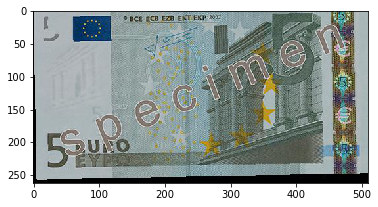

In [9]:
#How to plot images. This is probably what i'll be asked for the first quiz
#1)Import libraries (See above code snippet)
#2) Plot it like this
img = Image.open('/resources/data/train_data_keras/5/1.jpeg')
plt.imshow(img)

In [10]:
#Image preprocessing
#Use an ImageDataGenerator Object for each of the image folders 
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

#Reshape the images
#The target size will determine the reshaping size of the images accordingly
TARGET_SIZE = (224, 224)
#Batch size is the size of the batches used for training the network
BATCH_SIZE = 5
#Classes are all categories our training data belongs to (Name of the folders)
CLASSES = ['5', '10', '20', '50', '100', '200', '500']
#Set a random seed
RANDOM_SEED = 0
#Path of the folder containing the categorized images
path_train = "/resources/data/train_data_keras"
path_test= "/resources/data/test_data_keras"
path_val = "/resources/data/validation_data_keras"
#Create an Image Data Generator object as follows
#For trainining data
train_generator = ImageDataGenerator().flow_from_directory(path_train,
                                                           target_size=TARGET_SIZE,
                                                           batch_size=BATCH_SIZE,
                                                           classes=CLASSES,
                                                           seed=RANDOM_SEED,
                                                          shuffle=True)
#For validation data
validation_generator = ImageDataGenerator().flow_from_directory(path_val,
                                                               target_size=TARGET_SIZE,
                                                               batch_size=BATCH_SIZE,
                                                               classes=CLASSES,
                                                               seed=RANDOM_SEED,
                                                               shuffle=True)
#For test data
test_generator = ImageDataGenerator().flow_from_directory(path_test,
                                                               target_size=TARGET_SIZE,
                                                               batch_size=BATCH_SIZE,
                                                               classes=CLASSES,
                                                               seed=RANDOM_SEED)


Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [11]:
#Use a pre-trained keras model, ResNet50 to build currency classfier
from keras.layers import Dense
from keras.applications.resnet50 import ResNet50
from keras.models import Model

#Create a ResNet50 object
base = ResNet50(weights='imagenet')
#Set all layers to no trainable
for layer in base.layers:
    layer.trainable = False


102858752/102853048 [==============================] - 2s 0us/step


In [12]:
#Take the last hidden layer
sec_last_base = base.layers[-2].output
connected_model = Dense(len(CLASSES), activation='softmax')(sec_last_base)

#Use the input tensor of the ResNet50 model
base_input = base.input
#Use the Model function to create a connection between the ResNet50 to the new Dense layer
model = Model(inputs=base_input, outputs=connected_model)

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Train the model
#Training parameters
N_EPOCHS = 4
STEPS = train_generator.n // train_generator.batch_size
model.fit_generator(generator=train_generator, validation_data=validation_generator, steps_per_epoch=STEPS, epochs=N_EPOCHS)

Epoch 1/4
14/14 [==============================] - 327s 23s/step - loss: 1.8819 - acc: 0.3000 - val_loss: 1.5224 - val_acc: 0.4571
Epoch 2/4
14/14 [==============================] - 321s 23s/step - loss: 0.9014 - acc: 0.7429 - val_loss: 1.3926 - val_acc: 0.4714
Epoch 3/4
14/14 [==============================] - 323s 23s/step - loss: 0.3476 - acc: 0.9857 - val_loss: 1.1873 - val_acc: 0.5000
Epoch 4/4
14/14 [==============================] - 323s 23s/step - loss: 0.2122 - acc: 1.0000 - val_loss: 0.9830 - val_acc: 0.6143


In [125]:
#Create a VGG16 object
from keras.applications.vgg16 import VGG16

vgg16_base_model = VGG16(weights='imagenet')
for layer in vgg16_base_model.layers:
    layer.trainable = False
sec_last_vgg16_base = vgg16_base_model.layers[-2].output
connected_vgg16_model=Dense(len(CLASSES), activation='softmax')(sec_last_vgg16_base)
vgg16_custom_model = Model(inputs=vgg16_base_model.input, outputs=connected_vgg16_model)

In [130]:
#Compile and train model
vgg16_custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_custom_model.fit_generator(generator=train_generator,
                                validation_data=validation_generator,
                                epochs=N_EPOCHS,
                                steps_per_epoch=STEPS,
                                )

Epoch 1/4
14/14 [==============================] - 481s 34s/step - loss: 2.0831 - acc: 0.5000 - val_loss: 0.4817 - val_acc: 0.8571
Epoch 2/4
14/14 [==============================] - 479s 34s/step - loss: 0.1137 - acc: 0.9857 - val_loss: 0.0776 - val_acc: 0.9857
Epoch 3/4
14/14 [==============================] - 476s 34s/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 0.9857
Epoch 4/4
14/14 [==============================] - 478s 34s/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0767 - val_acc: 0.9857


1

In [133]:
# Save model to local directory
import sys
import os
from os import path

dirName = '/resources/models'
try:
    os.mkdir(dirName)
except FileExistsError:
    print("Directory ", dirName," already exists")

if ( not path.exists("/resources/models/currency_clfr_model.h5")):
    model.save(os.path.join(dirName, "currency_clfr_model.h5"))

if ( not path.exists("/resources/models/currency_clfr_model_vgg16.h5")):
    model.save(os.path.join(dirName, "currency_clfr_model_vgg16.h5"))


Directory  /resources/models  already exists


Model Training Accuracy:  1.0
Model Validation Accuracy:  0.6142857245036534


<Figure size 360x360 with 0 Axes>

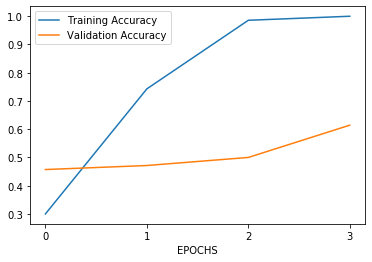

In [122]:
import numpy as np

train_history = model.history.history
print('Model Training Accuracy: ', train_history['acc'][-1])
print('Model Validation Accuracy: ', train_history['val_acc'][-1])

hor_axis = np.arange(0,len(train_history['acc']))
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
plt.plot(hor_axis, train_history['acc'], label='Training Accuracy')
plt.plot(hor_axis, train_history['val_acc'], label='Validation Accuracy')
plt.xlabel('EPOCHS')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, len(train_history['acc']), 1))
#plt.xticks(np.arange(min(train_history['acc']), max(train_history['acc']), 1.0))
#plt.ylabel('')
plt.legend()
plt.show()


In [120]:
sample_img_path = '/resources/data/train_data_keras/200/52.jpeg'
sample_img = Image.open(sample_img_path)
#model.summary()
sample_img_np = np.array(sample_img)

from keras.preprocessing.image import load_img, img_to_array
sample_img_np = img_to_array(load_img(sample_img_path, target_size=(224,224,3)))
sample_img_np = sample_img_np.reshape(1,224,224,3)

#np.argmax(, axis=0)
prediction_sample_img = model.predict(sample_img_np)


The predicted label is:  200


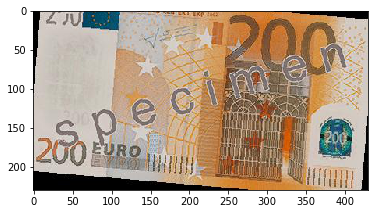

In [121]:
plt.imshow(sample_img)
print('The predicted label is: ', CLASSES[np.argmax(prediction_sample_img[0], axis=0)])

In [109]:
np.argmax(prediction_sample_img[0], axis=0)

2